$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cD {\mathcal{D}}$
$\def \cM {\mathcal{M}}$
$\def \cT {\mathcal{T}}$
$\def \bc {\mathbf{c}}$
$\def \bv {\mathbf{v}}$
$\def \bG {\mathbf{G}}$

# Training set size and accuracy of reduced bases

Now we look at progressive training, that is we have a relationship

$$
N = \lfloor n^{\alpha} \rfloor
$$

for some $\alpha$ in the set ```[1, 1.25, 1.5, 1.75, 2, 3]```. Then, for $n=1,\ldots,n_\max$ we train a basis $V_n$ from the usual OMP greedy procedure with a training set of size $N$. We do this ```num_runs``` times over. Each run we look at

$$
\delta(V_n) = \max_{u \in \cT} \| u - P_{V_n} u \|
$$

where $\cT$ is our _test set_ of solutions that are different from the training set. We then look at the average of these worst-case errors over all the runs.

We do this for a variety of dimensionalities of the parameter space $Y$, field parameter $\bar{a}$, and such.

In [1]:
import numpy as np
import math
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")
import pyhilbert as hil
import pyredmod as rm

%matplotlib inline

import os.path
from labellines import *
sns.set_style("whitegrid")
cp = sns.color_palette()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

Now lets plot the error curves. In the results below **each $V_n$ is constructed from a training set $\mathcal{Tr}$ of varying size $N$ from 40 to 10,000.** Each $V_n$ is constructed up to $n_{\mathrm{max}} = 40$, and we look at the approximation quality of each $V_n$ for varying $n$.

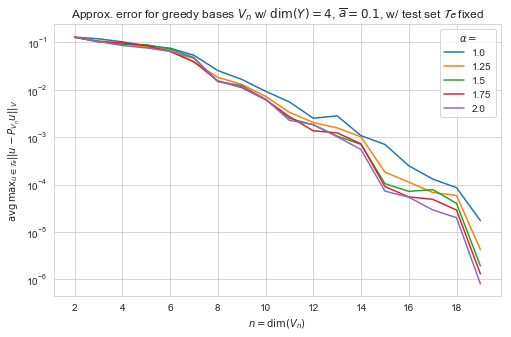

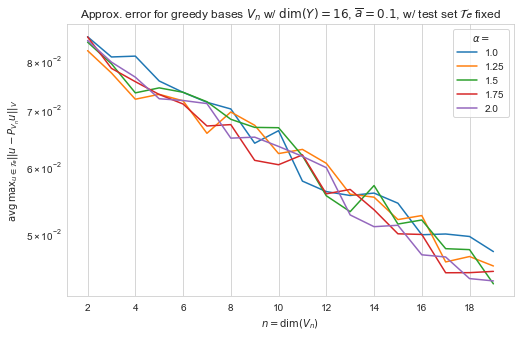

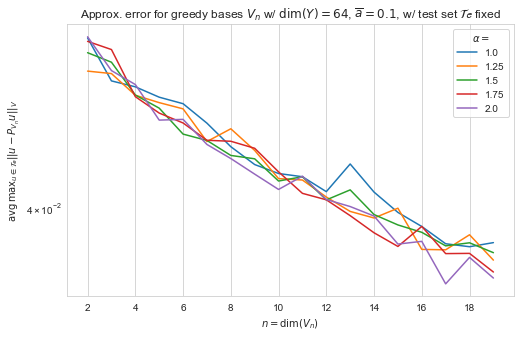

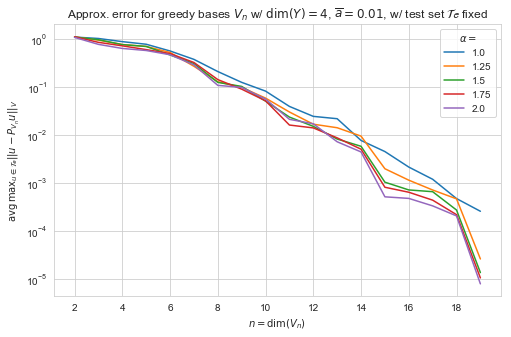

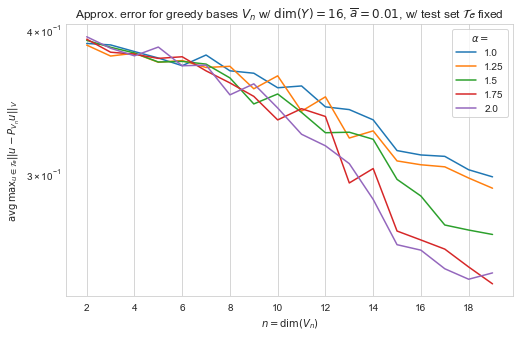

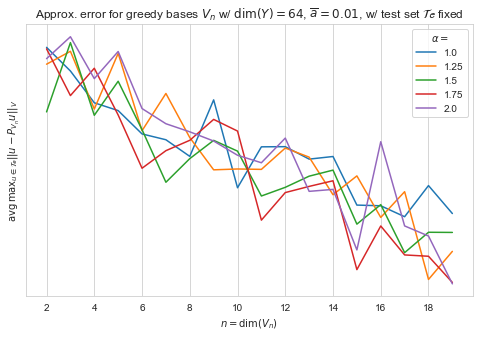

In [3]:
n_max = 20
num_runs = 10
alphas = [1.0, 1.25, 1.5, 1.75, 2.0]#, 3.0]
cp = sns.color_palette()

for a_bar_load in [0.1, 0.01]:
    for field_div_load in [1,2,3]:
        d_load = 2**(2*field_div_load)

        file = f'./scripts/results/02_max_errors_{d_load}_{a_bar_load}_{n_max}_{num_runs}.npy'
        max_err_load = np.load(file)
        file = f'./scripts/results/02_avg_errors_{d_load}_{a_bar_load}_{n_max}_{num_runs}.npy'
        avg_err_load = np.load(file)

        fig = plt.figure(figsize=(8, 5))
        for i, alpha in enumerate(alphas):
            plt.semilogy(range(2,n_max), max_err_load.mean(axis=1)[i,2:], label=f'{alpha}', color=cp[i])
            #for j in range(num_runs):
            #    plt.semilogy(range(2,n_max), max_err_load[i,j,2:], ':', lw=1, color=cp[i])
            
        plt.xlabel(rf'$n = \mathrm{{dim}}(V_n)$')
        plt.ylabel(rf'$\mathrm{{avg}} \, \mathrm{{max}}_{{u\in\mathcal{{Te}}}} || u - P_{{V_n}} u ||_V$')
        plt.title(rf'Approx. error for greedy bases $V_n$ w/ $\mathrm{{dim}}(Y)={d_load}$, $\overline{{a}} = {a_bar_load}$, w/ test set $\mathcal{{Te}}$ fixed')
        plt.legend(loc=1, title=r'$\alpha =$')
        plt.xticks(range(2,n_max,2))
        plt.show()

### Weighted, or anisotripic $\mathcal{Y}$

Say we have a dictionary $\mathcal{D}_N$ of size $N = \#(\mathcal{D}_N) = n^\alpha$ for some $\alpha$ (this is in line with the theory), then we look at $\varepsilon(n, \mathcal{D}_N)$ as we change $n$. This is _not a nested procedure_, that is we need to redo the complete greedy algorithm each time. We examine the quality of approximations

Furthermore we have a weighting on our parameters $y_j$ that go like $j^{-s}$ for $s=0,1,2$. This weighting is actually applied on a spiraling pattern in the dyadic squares in the unit square.

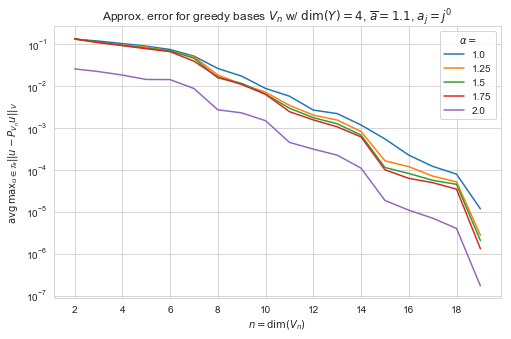

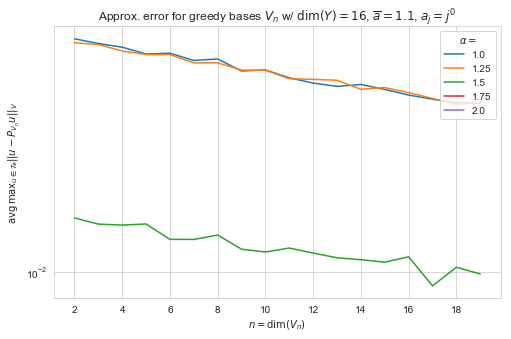

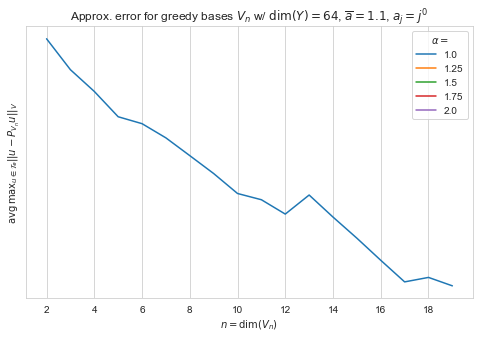

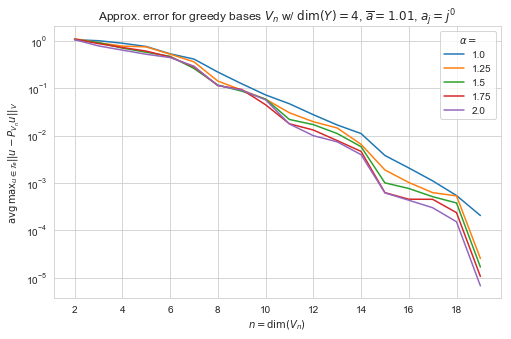

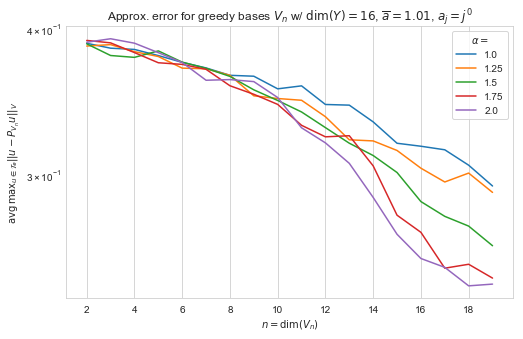

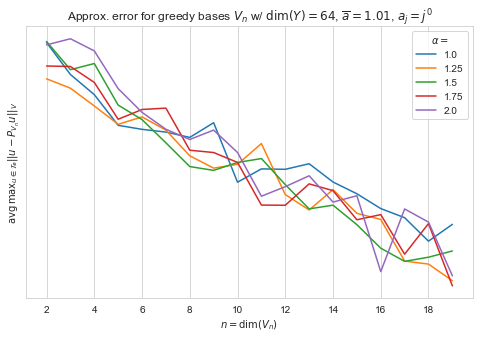

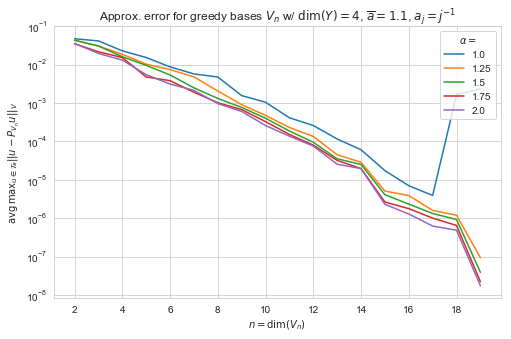

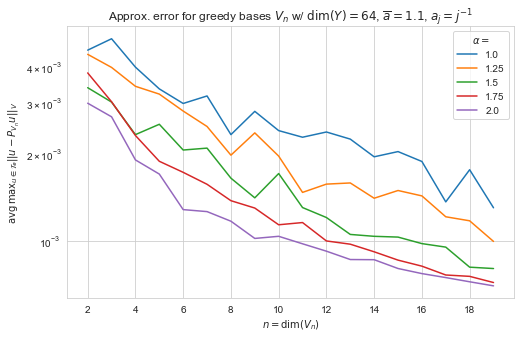

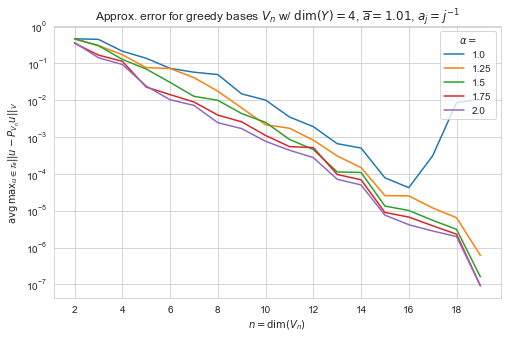

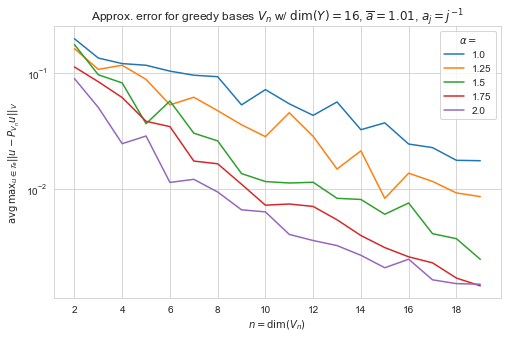

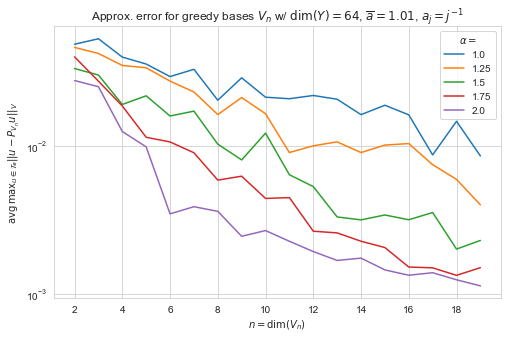

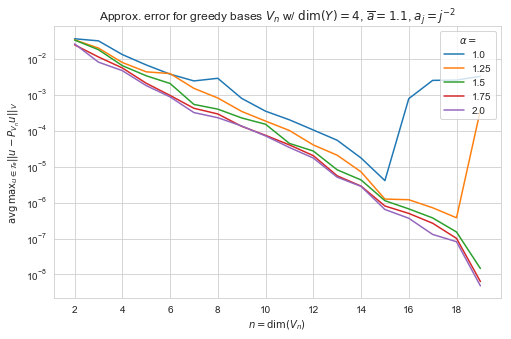

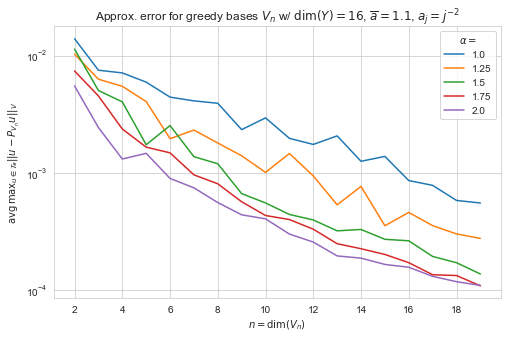

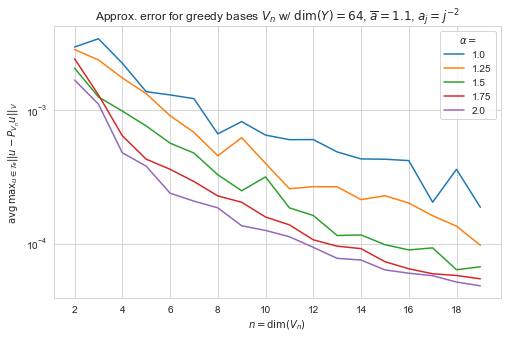

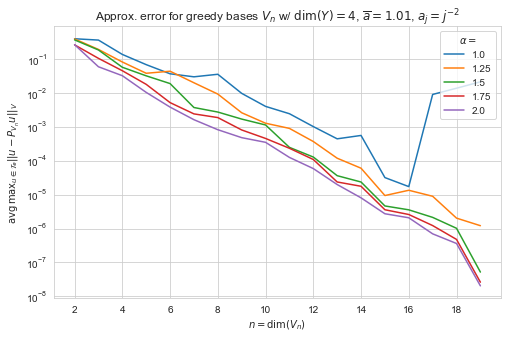

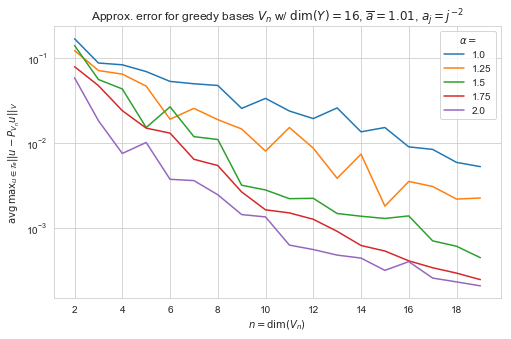

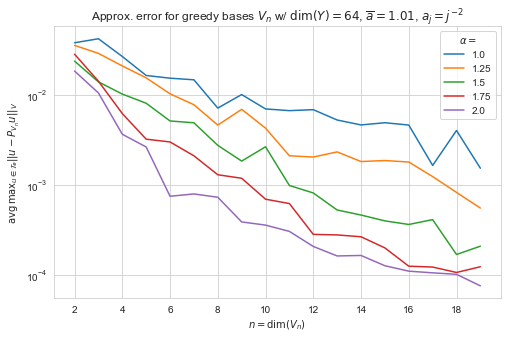

In [4]:
import os.path

n_max = 20
num_runs = 20
alphas = [1.0, 1.25, 1.5, 1.75, 2.0] #, 3.0]
cp = sns.color_palette()
ss = [0,1,2]

for s in ss:
    for a_bar_load in [1.1, 1.01]:
        for field_div_load in [1,2,3]:
            d_load = 2**(2*field_div_load)

            file = f'./scripts/results/02_max_errors_weight_{d_load}_{a_bar_load}_{n_max}_{num_runs}_{s}.npy'

            if os.path.exists(file):
                max_err_load = np.load(file)
                fig = plt.figure(figsize=(8, 5))
                for i, alpha in enumerate(alphas):
                    plt.semilogy(range(2,n_max), max_err_load.mean(axis=1)[i,2:], label=f'{alpha}', color=cp[i])

                plt.xlabel(rf'$n = \mathrm{{dim}}(V_n)$')
                plt.ylabel(rf'$\mathrm{{avg}} \, \mathrm{{max}}_{{u\in\mathcal{{Te}}}} || u - P_{{V_n}} u ||_V$')
                plt.title(rf'Approx. error for greedy bases $V_n$ w/ $\mathrm{{dim}}(Y)={d_load}$, $\overline{{a}} = {a_bar_load}$, $a_j = j^{{{-s}}}$')
                plt.legend(loc=1, title=r'$\alpha =$')
                plt.xticks(range(2,n_max,2))
                plt.show()

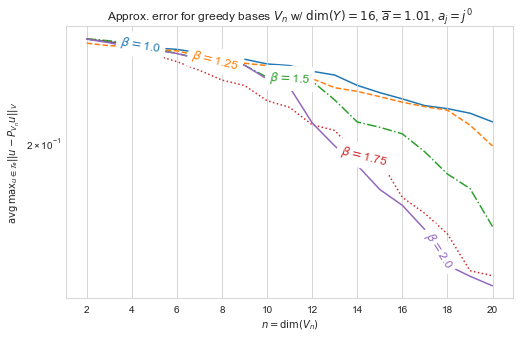

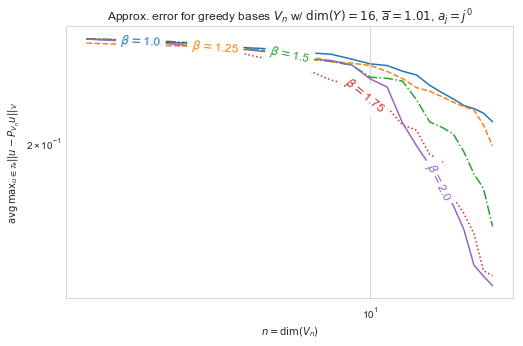

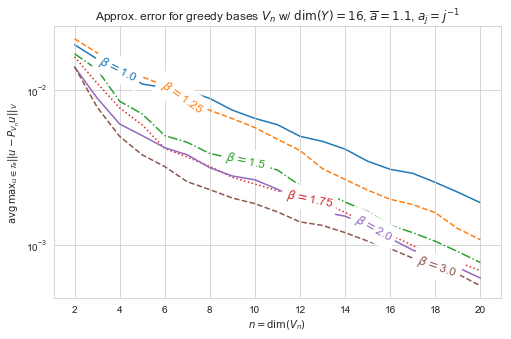

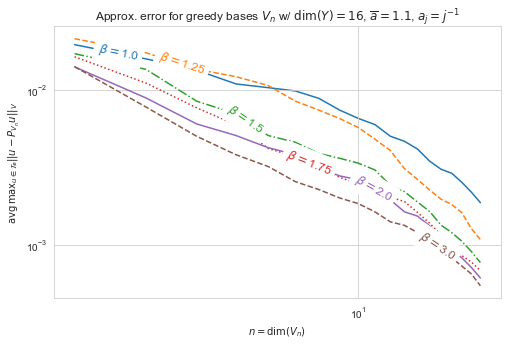

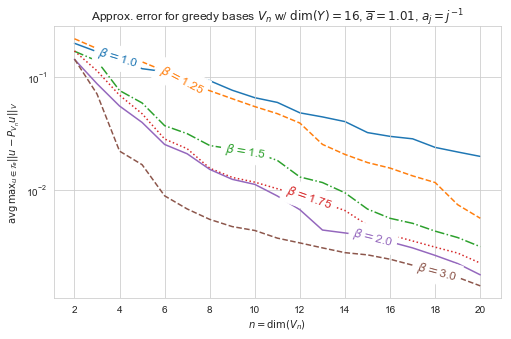

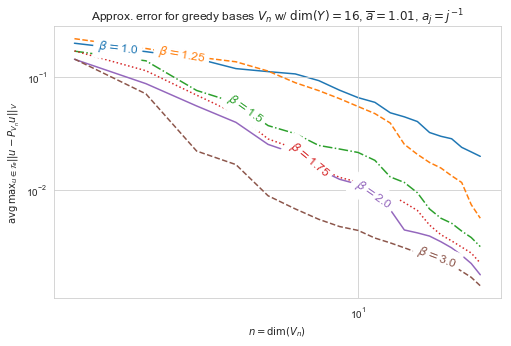

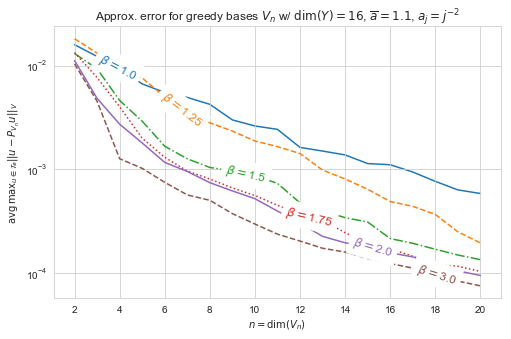

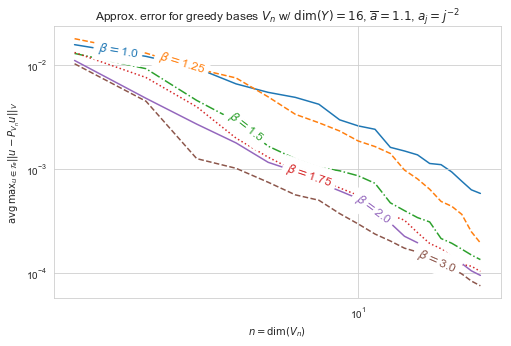

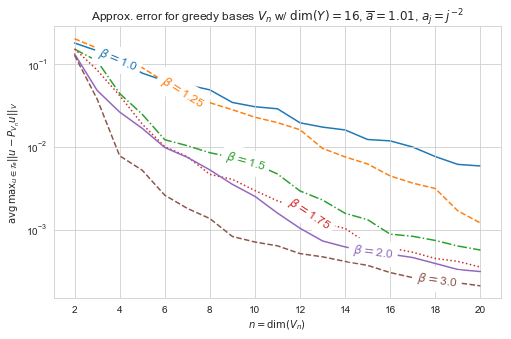

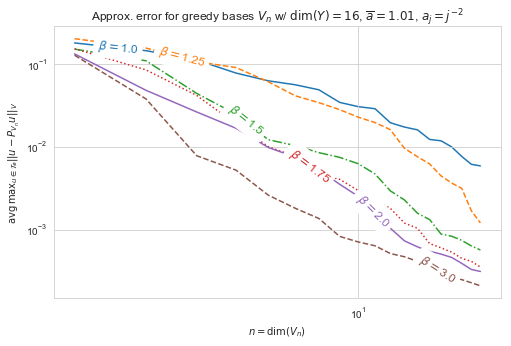

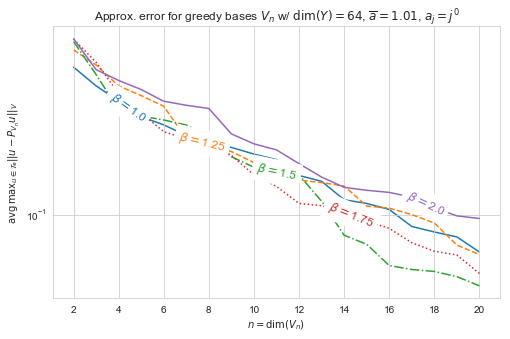

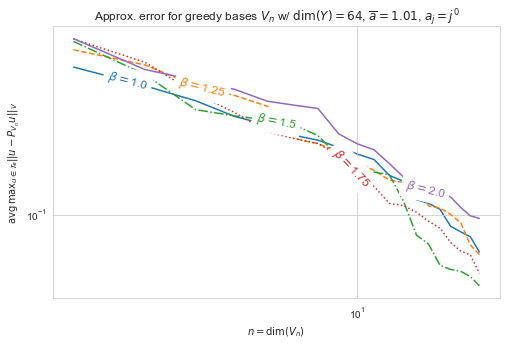

In [ ]:
n_max = 20
num_runs = 20
alphas = [1.0, 1.25, 1.5, 1.75, 2.0, 3.0]
ss = [0,1,2]
lss = ['-', '--', '-.', ':', '-', '--', '-.', ':']

for field_div_load in [2,3]:
    for s in ss:
        for a_bar_load in [1.1, 1.01]:
            d_load = 2**(2*field_div_load)

            file = f'./scripts/results/02_max_errors_embedded_{d_load}_{a_bar_load}_{n_max}_{num_runs}_{s}.npy'

            if os.path.exists(file):
                max_err_load = np.load(file)
                fig = plt.figure(figsize=(8, 5))

                for i, alpha in enumerate(alphas[:max_err_load.shape[0]]):
                    plt.semilogy(range(2,n_max+1), max_err_load.mean(axis=1)[i,1:], lss[i], label=rf'$\beta=${alpha}', color=cp[i], zorder=2*i)
                    
                plt.xlabel(rf'$n = \mathrm{{dim}}(V_n)$')
                plt.ylabel(rf'$\mathrm{{avg}} \, \mathrm{{max}}_{{u\in\mathcal{{Te}}}} || u - P_{{V_n}} u ||_V$')
                plt.title(rf'Approx. error for greedy bases $V_n$ w/ $\mathrm{{dim}}(Y)={d_load}$, $\overline{{a}} = {a_bar_load}$, $a_j = j^{{{-s}}}$')
                plt.xticks(range(2,n_max+1,2))                

                ax = plt.gca()
                xmin,xmax = ax.get_xlim()
                labelLines(plt.gca().get_lines(),zorder=10+1, fontsize=12)
                    
                plt.savefig(f'./figs/02_max_errors_embedded_{d_load}_{a_bar_load}_{n_max}_{num_runs}_{s}.pdf')
                plt.show()                
                
                fig = plt.figure(figsize=(8, 5))
                for i, alpha in enumerate(alphas[:max_err_load.shape[0]]):
                    plt.loglog(range(2,n_max+1), max_err_load.mean(axis=1)[i,1:], lss[i], label=rf'$\beta=${alpha}', color=cp[i], zorder=2*i)
                plt.xlabel(rf'$n = \mathrm{{dim}}(V_n)$')
                plt.ylabel(rf'$\mathrm{{avg}} \, \mathrm{{max}}_{{u\in\mathcal{{Te}}}} || u - P_{{V_n}} u ||_V$')
                plt.title(rf'Approx. error for greedy bases $V_n$ w/ $\mathrm{{dim}}(Y)={d_load}$, $\overline{{a}} = {a_bar_load}$, $a_j = j^{{{-s}}}$')      

                ax = plt.gca()
                xmin,xmax = ax.get_xlim()
                labelLines(plt.gca().get_lines(),zorder=10+1, fontsize=12)
                    
                plt.savefig(f'./figs/02_max_errors_embedded_loglog_{d_load}_{a_bar_load}_{n_max}_{num_runs}_{s}.pdf')
                plt.show()